In [1]:
import numpy as np
import pandas as pd

In [2]:
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.io import show, output_file, output_notebook
from bokeh.palettes import Spectral6, brewer, d3
from bokeh.transform import factor_cmap, linear_cmap

In [3]:
output_notebook()

Loading BokehJS ...

In [4]:
import geoviews as gv
import holoviews as hv

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
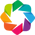

In [5]:
hv.extension('bokeh')

In [6]:
import os

In [7]:
DATA_DIR = r'C:\Projects\Amazon\Applications\SA_Capetown'
DATA_FILE = os.path.join(DATA_DIR, 'SA_Capetown_Model_v3.csv')
print(DATA_FILE)

C:\Projects\Amazon\Applications\SA_Capetown\SA_Capetown_Model_v3.csv


In [8]:
df = pd.read_csv(DATA_FILE)
df.head()

Employee_ID    Office    VoT  Coeff_Cost_Drive  Coeff_Cost_Transit  \
0     sample1  CPT13_pt  13.04          -0.00115            -0.00115   
1    sample10  CPT13_pt  13.04          -0.00115            -0.00115   
2   sample100  CPT13_pt  13.04          -0.00115            -0.00115   
3  sample1000     CPT10  13.04          -0.00115            -0.00115   
4  sample1001     CPT10  13.04          -0.00115            -0.00115   

   Coeff_Cost_Bike  Coeff_Cost_Walk  Commute_Distance_TOTAL  \
0        -0.006902        -0.001725                   16.22   
1        -0.006902        -0.001725                    2.16   
2        -0.006902        -0.001725                   17.98   
3        -0.006902        -0.001725                   17.72   
4        -0.006902        -0.001725                   20.90   

   Commute_Distance_Oneway  Distance_Drive  ...  Distance_Walk  Time_Walk  \
0                     8.11           16.22  ...          18.65     373.06   
1                     1.08            2.16  ...           2.48      49.68   
2                     8.99           17.98  ...          20.68     413.54   
3                     8.86           17.72  ...          20.38     407.56   
4                    10.45           20.90  ...          24.04     480.70   

   Cost_Walk  Utility_Walk  Prob_Walk  Prob_Total  Prediction          X  \
0        0.0        -13.49       0.00         1.0         1.0  18.496877   
1        0.0         -1.36       0.35         1.0         1.0  18.414839   
2        0.0        -15.01       0.00         1.0         1.0  18.508354   
3        0.0        -14.78       0.00         1.0         1.0  18.492304   
4        0.0        -17.53       0.00         1.0         1.0  18.579903   

           Y   Mode  
0 -33.965254  DRIVE  
1 -33.924405  DRIVE  
2 -33.974077  DRIVE  
3 -33.850579  DRIVE  
4 -33.952412  DRIVE  

[5 rows x 36 columns]

### <span class="burk"><span class="girk">Individual Plots</span></span>

#### Total Mode Share

In [8]:
df_total_mode_share = df.groupby('Mode', as_index=False)['Employee_ID'].count().rename(columns={'Employee_ID':'Travelers'})
df_total_mode_share['Share'] = df_total_mode_share.Travelers / np.sum(df_total_mode_share.Travelers)
df_total_mode_share

Mode  Travelers     Share
0    DRIVE       4706  0.760996
1  TRANSIT       1137  0.183862
2     WALK        341  0.055142

In [17]:
p = figure(x_range=df_total_mode_share.Mode, plot_height=400, title="Mode Share")
p.vbar(x='Mode', top='Share', width=0.5, source=ColumnDataSource(df_total_mode_share), legend="Mode", 
       fill_color=factor_cmap('Mode', palette=Spectral6, factors=df_total_mode_share.Mode))
show(p)

#### Mode Share by Offices

In [31]:
offices, modes = df.Office.unique(), df.Mode.unique()

In [32]:
index_office_mode = pd.MultiIndex.from_product((offices, modes))
index_office_mode

MultiIndex(levels=[['CPT10', 'CPT11_pt', 'CPT12_pt', 'CPT13_pt', 'CPT2'], ['DRIVE', 'TRANSIT', 'WALK']],
           codes=[[3, 3, 3, 0, 0, 0, 4, 4, 4, 2, 2, 2, 1, 1, 1], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [44]:
df_modes_by_offices = df.groupby(['Office', 'Mode'])['Employee_ID'].count()
df_modes_by_offices = pd.DataFrame(df_modes_by_offices.reindex(index_office_mode)).rename(columns={'Employee_ID':'Travelers'})
df_modes_by_offices['Share'] = df_modes_by_offices.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_modes_by_offices = df_modes_by_offices.reset_index().rename(columns={'level_0': 'Office', 'level_1': 'Mode'})
df_modes_by_offices

Office     Mode  Travelers      Share
0   CPT13_pt    DRIVE        521  95.772059
1   CPT13_pt  TRANSIT         18   3.308824
2   CPT13_pt     WALK          5   0.919118
3      CPT10    DRIVE       1930  94.561489
4      CPT10  TRANSIT         51   2.498775
5      CPT10     WALK         60   2.939735
6       CPT2    DRIVE       1894  59.615990
7       CPT2  TRANSIT       1058  33.301857
8       CPT2     WALK        225   7.082153
9   CPT12_pt    DRIVE        143  91.082803
10  CPT12_pt  TRANSIT          3   1.910828
11  CPT12_pt     WALK         11   7.006369
12  CPT11_pt    DRIVE        218  82.264151
13  CPT11_pt  TRANSIT          7   2.641509
14  CPT11_pt     WALK         40  15.094340

In [45]:
ds_modes_by_offices = hv.Dataset(df_modes_by_offices, kdims=['Office', 'Mode'], vdims=['Travelers', 'Share'])
ds_modes_by_offices

:Dataset   [Office,Mode]   (Travelers,Share)

In [61]:
curves = ds_modes_by_offices.to(hv.Bars, kdims=['Mode'], vdims=['Share'])
curves.opts(color=hv.dim('Mode'))
curves

:HoloMap   [Office]
   :Bars   [Mode]   (Share)

In [50]:
ds_modes_by_offices_gb = ds_modes_by_offices.groupby('Office')
ds_modes_by_offices_gb.data[('CPT10',)].data

Office     Mode  Travelers      Share
3  CPT10    DRIVE       1930  94.561489
4  CPT10  TRANSIT         51   2.498775
5  CPT10     WALK         60   2.939735

In [37]:
curve = hv.Bars(df_modes_by_offices, kdims=['level_0', 'level_1'], vdims=['Share'])
curve.opts(width=600)

:Bars   [level_0,level_1]   (Share)

In [ ]:
kdims = [hv.Dimension(('level_0', 'Office')),
         hv.Dimension(('level_1', 'Mode'))]
holomap = hv.HoloMap(df_modes_by_offices, kdims=kdims)
holomap.opts(opts.Curve(width=600))

In [31]:
p = figure(x_range=df_modes_by_offices.Mode, plot_height=400, title="Mode Share")
p.vbar(x='Mode', top='Share', width=0.5, source=ColumnDataSource(df_total_mode_share), legend="Mode", 
       fill_color=factor_cmap('Mode', palette=Spectral6, factors=df_total_mode_share.Mode))
show(p)

Travelers      Share
CPT13_pt DRIVE          521  95.772059
         TRANSIT         18   3.308824
         WALK             5   0.919118
CPT10    DRIVE         1930  94.561489
         TRANSIT         51   2.498775
         WALK            60   2.939735
CPT2     DRIVE         1894  59.615990
         TRANSIT       1058  33.301857
         WALK           225   7.082153
CPT12_pt DRIVE          143  91.082803
         TRANSIT          3   1.910828
         WALK            11   7.006369
CPT11_pt DRIVE          218  82.264151
         TRANSIT          7   2.641509
         WALK            40  15.094340

In [73]:
cds = ColumnDataSource(df_modes_by_offices)
p = figure(x_range=FactorRange(*(index_office_mode.to_list())), plot_height=400, title="Mode Share by Office", tools="hover")
p.vbar(x='index', top='Share', width=0.5, source=cds, line_color="white",
       fill_color=factor_cmap('index', palette=d3['Category10'][3], factors=df_modes_by_offices.index.levels[1], start=1, end=2))
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
show(p)

#### Commute Distance Distribution

In [80]:
bins = np.arange(0, 62, 2)
hist, edges = np.histogram(df.Commute_Distance_Oneway, density=True, bins=bins)

In [84]:
p = figure(plot_width=800, title='One-Way Commute Distance', background_fill_color="#fafafa")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       fill_color="navy", line_color="white", alpha=0.5)

p.y_range.start = 0
p.xaxis.axis_label = 'Distance (Miles)'
p.yaxis.axis_label = 'Proportion'
p.grid.grid_line_color="white"
show(p)

#### Mode Choices by Distance

In [131]:
bins = np.arange(0, 62, 2)
shares_by_distance = {}
for m in df.Mode.unique():
    share = pd.cut(df.loc[df.Mode == m, 'Commute_Distance_Oneway'], bins=bins).value_counts().sort_index().values
    share = share / np.sum(share)
    shares_by_distance[m] = share

In [139]:
from scipy import interpolate
colors = d3['Category20'][3]
p = figure(plot_width=800, title='Mode Share by Commute Distance', background_fill_color="#fafafa")
for (m, s), color in zip(shares_by_distance.items(), colors):
    xp, fp = bins[:-1], s
    xs = np.linspace(0, 50, 1000)
    f = interpolate.interp1d(xp, fp, kind='cubic')
    ys = f(xs)
    p.line(xs, ys, line_color=color, line_width=4, alpha=0.7, legend=m)
p.legend.background_fill_color = "#fefefe"
p.y_range.start = 0
p.x_range.start, p.x_range.end = 0, 50
p.xaxis.axis_label = 'Distance (Miles)'
show(p)

ModuleNotFoundError: No module named 'scipy'

#### Hexbin of Employee Distribution

In [27]:
from geoviews import opts

In [ ]:
opts.HexTiles()

In [25]:
h = gv.HexTiles(df, ['X', 'Y'])


In [26]:
h.opts.info()

:HexTiles   [X,Y]   (Employee_ID,Office,VoT,Coeff_Cost_Drive,Coeff_Cost_Transit,Coeff_Cost_Bike,Coeff_Cost_Walk,Commute_Distance_TOTAL,Commute_Distance_Oneway,Distance_Drive,Time_Drive,Cost_Drive,Utility_Drive,Prob_Drive,Distance_Transit,Time_Transit,Time_Walk_AccEgr,Wait_Transit,Cost_Transit,Utility_Transit,Prob_Transit,Distance_Bike,Time_Bike,Cost_Bike,Utility_Bike,Prob_Bike,Distance_Walk,Time_Walk,Cost_Walk,Utility_Walk,Prob_Walk,Prob_Total,Prediction,Mode)


In [21]:
p.kdims, p.vdims

([Dimension('X'), Dimension('Y')], [])

In [28]:
overlay = gv.WMTS('https://mt1.google.com/vt/lyrs=m&x={X}&y={Y}&z={Z}') * gv.HexTiles(df, ['X', 'Y'],)

In [30]:
overlay.opts(gv.opts.HexTiles(width=800, height=600, alpha=0.5, tools=['hover'], colorbar=True), gv.opts.WMTS(width=800))

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .HexTiles.I :HexTiles   [X,Y]   (Employee_ID,Office,VoT,Coeff_Cost_Drive,Coeff_Cost_Transit,Coeff_Cost_Bike,Coeff_Cost_Walk,Commute_Distance_TOTAL,Commute_Distance_Oneway,Distance_Drive,Time_Drive,Cost_Drive,Utility_Drive,Prob_Drive,Distance_Transit,Time_Transit,Time_Walk_AccEgr,Wait_Transit,Cost_Transit,Utility_Transit,Prob_Transit,Distance_Bike,Time_Bike,Cost_Bike,Utility_Bike,Prob_Bike,Distance_Walk,Time_Walk,Cost_Walk,Utility_Walk,Prob_Walk,Prob_Total,Prediction,Mode)

In [23]:
gv.WMTS('https://mt1.google.com/vt/lyrs=m&x={X}&y={Y}&z={Z}').opts(width=800, height=600)

:WMTS   [Longitude,Latitude]

### Simple Dashboard

In [11]:
import panel as pn
pn.extension()

In [12]:
import param

In [17]:
unique_offices, unique_modes = df.Office.unique(), df.Mode.unique()
index_office_mode = pd.MultiIndex.from_product((unique_offices, unique_modes))

In [28]:
class ViewModebyOffice(param.Parameterized):

    office = param.Selector(objects=unique_offices)
    
    @param.depends('office') 
    def plot(self):
        df_modes_by_offices = df.groupby(['Office', 'Mode'])['Employee_ID'].count()
        df_modes_by_offices = pd.DataFrame(df_modes_by_offices.reindex(index_office_mode)).rename(columns={'Employee_ID':'Travelers'})
        df_modes_by_offices['Share'] = df_modes_by_offices.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
        df_modes_by_offices = df_modes_by_offices.reset_index().rename(columns={'level_0': 'Office', 'level_1': 'Mode'})
        df_select = df_modes_by_offices.loc[df_modes_by_offices.Office == self.office]
        elem = hv.Bars(df_select, kdims=['Mode'], vdims=['Share'])
        return elem.opts(width=600, height=400, show_grid=True, ylim=(0, 100), tools=['hover'])


In [29]:
viewer_modebyoffice = ViewModebyOffice()
panel_modebyoffice = pn.Row(viewer_modebyoffice.param, viewer_modebyoffice.plot)

In [30]:
import param

class Sine(param.Parameterized):
    amplitude = param.Number(default=1, bounds=(0, None), softbounds=(0,5))
    frequency = param.Number(default=2, bounds=(0, 10))
    n = param.Integer(default=200, bounds=(1, 200))

    def view(self):
        return sine(self.frequency, self.amplitude, self.n)
    
sine_obj = Sine()

In [36]:
panel_modebyoffice.servable()
# panel_modebyoffice.app('localhost:8888',port=5433)

Row
    [0] Column(margin=5, name='Param03744', width=300)
        [0] StaticText(value='<b>ViewModebyOffice</b>')
        [1] Select(name='Office', options=OrderedDict([('CPT13_pt', ...]), value='CPT13_pt')
    [1] ParamMethod(method)

### <span class="girk">Scratch</span>

In [4]:
class DriveParameter(param.Parameterized):
    average_drive_speed = param.Number(45,bounds=(0,80), precedence=-1)
    auto_operating_cost = param.Number(30, bounds=(0, 100), precedence=1)
    
    @param.depends('average_drive_speed', 'auto_operating_cost')
    def prob(self, x):
        return self.average_drive_speed * x + self.auto_operating_cost

In [5]:
drive_predictor = DriveParameter()

In [6]:
pn.Row(drive_predictor.param)

Row
    [0] Column(margin=5, name='Param00007', width=300)
        [0] StaticText(value='<b>DriveParameter</b>')
        [1] FloatSlider(end=100, name='Auto operating cost', start=0, value=30)

In [9]:
print(drive_predictor.prob(100))

4589.8


In [27]:
hv.help(hv.Bars)

Bars

Online example: http://holoviews.org/reference/elements/bokeh/Bars.html

-------------
Style Options
-------------

	alpha, bar_width, cmap, color, fill_alpha, fill_color, hover_alpha, hover_color, hover_fill_alpha, hover_fill_color, hover_line_alpha, hover_line_color, line_alpha, line_cap, line_color, line_dash, line_join, line_width, muted_alpha, muted_color, muted_fill_alpha, muted_fill_color, muted_line_alpha, muted_line_color, nonselection_alpha, nonselection_color, nonselection_fill_alpha, nonselection_fill_color, nonselection_line_alpha, nonselection_line_color, selection_alpha, selection_color, selection_fill_alpha, selection_fill_color, selection_line_alpha, selection_line_color, width

(Consult bokeh's documentation for more information.)

------------
Plot Options
------------

The plot options are the parameters of the plotting class:

Parameters of 'BarPlot'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Co

In [11]:
number_lines = 10000
number_pts = 3

xs = [np.random.randint(0, 100+1, number_pts) for _ in range(number_lines)]
ys = [np.random.randint(0, 100+1, number_pts) for _ in range(number_lines)]


p = figure(plot_width=800, plot_height=800)

p.multi_line(xs, ys, line_width=1)

show(p)

In [13]:
number_pts = 300_000

xs = np.random.randint(0, 10000+1, number_pts)
ys = np.random.randint(0, 10000+1, number_pts)


p = figure(plot_width=800, plot_height=800)

p.circle(xs, ys, size=2, color="navy", alpha=0.5)

show(p)


In [8]:
np.random.randint(0, 100+1, 3)

array([31, 14, 15])